In [1]:
import numpy as np
from astropy.table import Table
from scipy.optimize import fmin
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
from scipy.integrate import simps, quad

In [2]:
def SF(dt, Mi):
    A = 1.0
    B = 0.024
    C = 0.3
    return A*(1+B*Mi)*(dt/6500.)**C

In [3]:
def func(x, mag_diff, delta_c, mag_diff_err2):
    return np.exp(-np.abs(mag_diff-x)/delta_c) * np.exp(-0.5*(x**2/mag_diff_err2))

In [4]:
def prob(mag_diff, mag_diff_err2, delta_c):
    p = quad(func, -np.inf, np.inf, args=(mag_diff, delta_c, mag_diff_err2))[0]
    return p

In [5]:
def log_p(dt, Mi, mag_diff, mag_diff_err2):
    delta_c = SF(dt, Mi)/2**0.5
    lp = 0.
    for k in range(len(mag_diff)):
        p = prob(mag_diff[k], mag_diff_err2[k], delta_c[k])
        lp += np.log(p)
    lp -= np.log(delta_c).sum()
    return lp

In [6]:
#Make all combinations of magnitude differences and errors.
def get_pairs(lc):
    dt = list()
    mag_diff = list()
    mag_diff_err2 = list()
    for i in range(len(lc['mjd'])):
        for j in range(i+1, len(lc['mjd'])):
            dt.append(lc['mjd'][i]-lc['mjd'][j])
            mag_diff.append(lc['psMag'][i]-lc['psMag'][j])
            mag_diff_err2.append(lc['psMagErr'][i]**2+lc['psMagErr'][j]**2)
    dt = np.array(dt)
    mag_diff = np.array(mag_diff)
    mag_diff_err2 = np.array(mag_diff_err2)
    return dt, mag_diff, mag_diff_err2

In [7]:
fnames = [
    "object1415792.dat",
    "object1444606.dat",
    "object1464480.dat",
    "object1465497.dat",
]
Mis = [
    -24.156505,
    -25.624948,
    -24.113255,
    -23.645797,
]

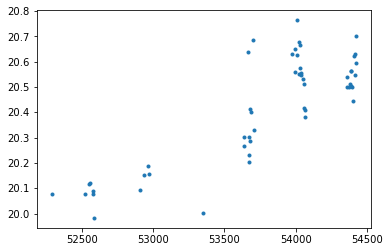

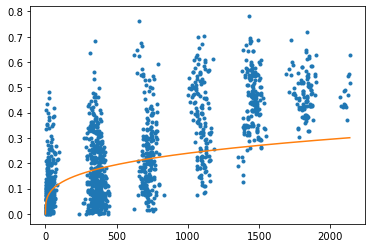

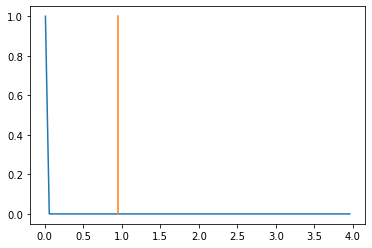

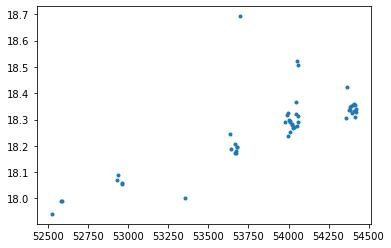

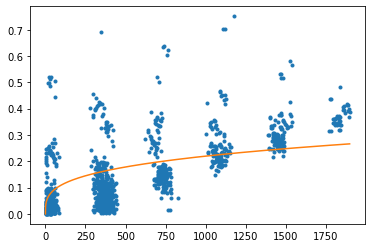

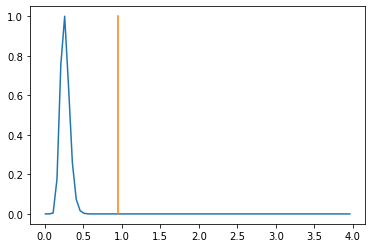

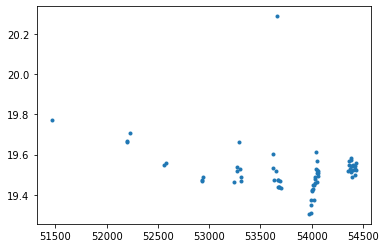

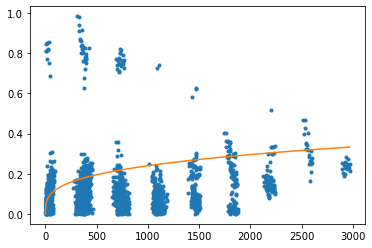

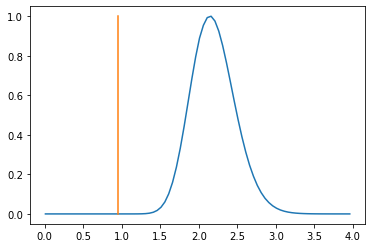

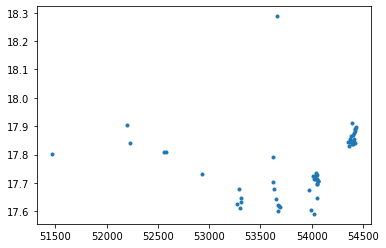

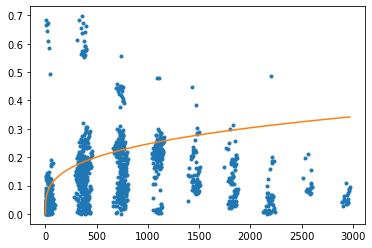

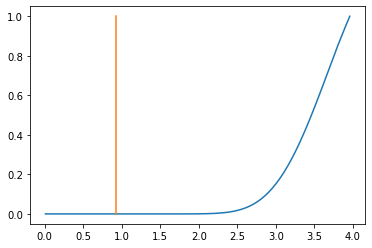

In [42]:
for k, Mi in enumerate(Mis):

    fname = fnames[k]
    lc = Table.read(fname, format='ascii')
    lc.sort('mjd', reverse=True)

    dt, mag_diff, mag_diff_err2 = get_pairs(lc)

    plt.plot(lc['mjd'], lc['psMag'], '.')
    plt.show()

    plt.plot(dt, np.abs(mag_diff), '.')
    dt_obs = np.arange(0,np.max(dt),1)
    plt.plot(dt_obs, SF(dt_obs, Mi))
    plt.show()

    zs = np.arange(0.01, 4.0, 0.05)
    lPDF = np.zeros(zs.shape)
    Mi_z = Mi + cosmo.distmod(lc['z'][0]).value - cosmo.distmod(zs).value
    for i, z in enumerate(zs):
        lPDF[i] = log_p(dt, Mi_z[i], mag_diff, mag_diff_err2)
    norm = np.max(lPDF)
    lPDF -= norm
    plt.plot(zs, np.exp(lPDF))
    plt.plot([lc['z'][0], lc['z'][0]], [0.,1.])
    plt.show()

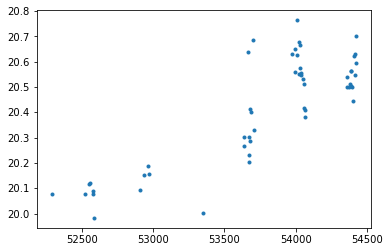

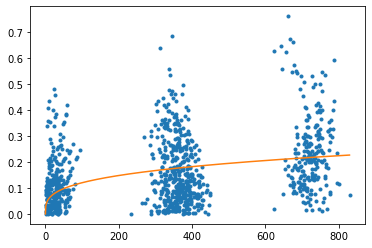

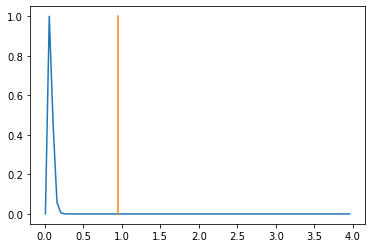

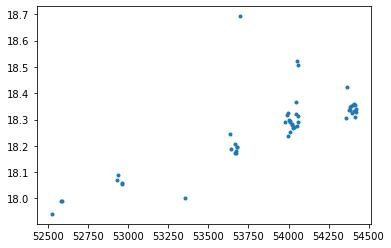

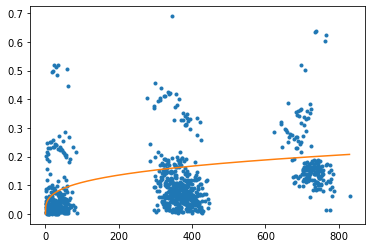

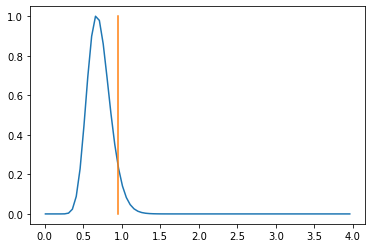

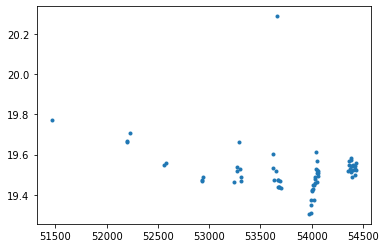

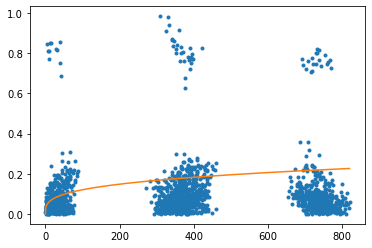

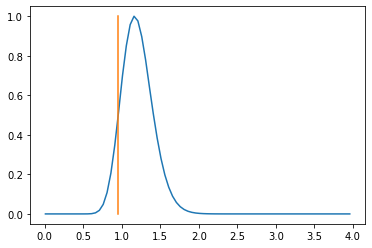

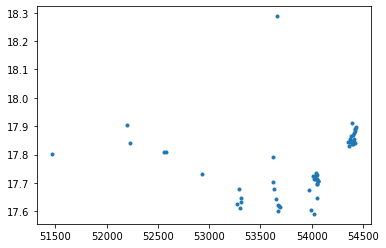

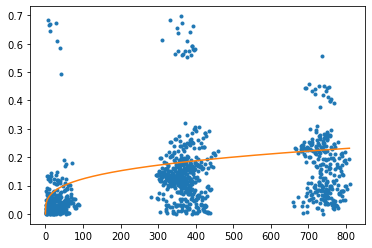

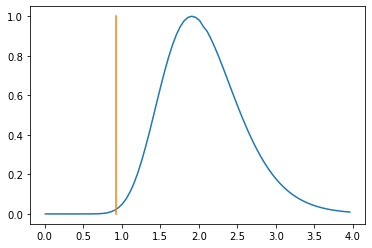

In [45]:
for k, Mi in enumerate(Mis):

    fname = fnames[k]
    lc = Table.read(fname, format='ascii')
    lc.sort('mjd', reverse=True)

    dt_all, mag_diff_all, mag_diff_err2_all = get_pairs(lc)

    cond = dt_all<1000.
    dt = dt_all[cond]
    mag_diff = mag_diff_all[cond]
    mag_diff_err2 = mag_diff_err2_all[cond]

    plt.plot(lc['mjd'], lc['psMag'], '.')
    plt.show()

    plt.plot(dt, np.abs(mag_diff), '.')
    dt_obs = np.arange(0,np.max(dt),1)
    plt.plot(dt_obs, SF(dt_obs, Mi))
    plt.show()

    zs = np.arange(0.01, 4.0, 0.05)
    lPDF = np.zeros(zs.shape)
    Mi_z = Mi + cosmo.distmod(lc['z'][0]).value - cosmo.distmod(zs).value
    for i, z in enumerate(zs):
        lPDF[i] = log_p(dt, Mi_z[i], mag_diff, mag_diff_err2)
    norm = np.max(lPDF)
    lPDF -= norm
    plt.plot(zs, np.exp(lPDF))
    plt.plot([lc['z'][0], lc['z'][0]], [0.,1.])
    plt.show()